In [1]:
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.fftpack import dct
import librosa
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import soundfile
import sklearn

import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display
import random
import warnings
import os
from PIL import Image
import pathlib
import csv
# sklearn Preprocessing
from sklearn.model_selection import train_test_split
#Keras
import keras
import warnings
warnings.filterwarnings('ignore')
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras.optimizers import SGD

In [11]:
#to list all files within directory
os.listdir('../data/nsynth-train/audio')

['bass_synthetic_107-106-100.wav',
 'mallet_acoustic_035-114-127.wav',
 'keyboard_electronic_035-070-025.wav',
 'keyboard_electronic_058-056-100.wav',
 'bass_synthetic_119-092-127.wav',
 'mallet_acoustic_053-029-025.wav',
 'organ_electronic_070-047-075.wav',
 'guitar_electronic_032-049-050.wav',
 'keyboard_electronic_057-037-075.wav',
 'organ_electronic_026-036-050.wav',
 'bass_synthetic_001-016-127.wav',
 'keyboard_electronic_080-029-075.wav',
 'synth_lead_synthetic_009-086-075.wav',
 'guitar_electronic_019-058-050.wav',
 'mallet_acoustic_059-081-050.wav',
 'brass_acoustic_047-067-127.wav',
 'bass_synthetic_132-083-127.wav',
 'mallet_acoustic_000-091-100.wav',
 'guitar_electronic_040-048-100.wav',
 'keyboard_electronic_073-047-100.wav',
 'organ_electronic_054-037-100.wav',
 'organ_electronic_083-029-100.wav',
 'flute_acoustic_022-077-050.wav',
 'guitar_acoustic_016-106-075.wav',
 'keyboard_acoustic_015-085-075.wav',
 'bass_synthetic_101-074-075.wav',
 'vocal_acoustic_014-079-075.wav',

In [17]:
audio_file_path = '../data/nsynth-train/audio/keyboard_electronic_058-056-100.wav'


# audio_data = 'nsynth-valid/audio/bass_electronic_018-022-025.wav'
# # audio_data = 'nsynth-valid/audio/brass_acoustic_006-046-100.wav'
# x, sr = librosa.load(audio_data, sr=16000)

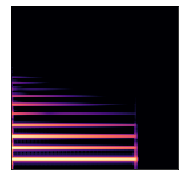

In [26]:
plt.figure(figsize=(3,3))
#         audio_file_path = f'{path_to_audio_folder}/{filename}'
x, sr = librosa.load(audio_file_path, sr=None)
S = librosa.feature.melspectrogram(x, sr=sr)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max));

In [27]:
def get_spectrograms(path_to_audio_folder, path_to_spec_image_folder):
    for filename in os.listdir(path_to_audio_folder):
        plt.figure(figsize=(3,3))
        audio_file_path = f'{path_to_audio_folder}/{filename}'
        x, sr = librosa.load(str(pathlib.Path(audio_file_path)), sr=None)
        S = librosa.feature.melspectrogram(x, sr=sr)
        librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
        plt.axis('off')                      
        plt.savefig(f"{path_to_spec_image_folder}/{filename[:-3].replace('.', '')}.png", bbox_inches='tight')                    
        plt.close('all')
        

In [ ]:
def get_mfccs(path_to_audio_folder, path_to_image_folder):
    for filename in os.listdir(path_to_audio_folder):
        plt.figure(figsize=(3,3))
        audio_file_path = f'{path_to_audio_folder}/{filename}'
        # x, sr = librosa.load(audio_file_path, sr=16000)
        x, sr = librosa.load(str(pathlib.Path(audio_file_path)))
        mfccs = librosa.feature.mfcc(x, sr=sr)
        librosa.display.specshow(mfccs, sr=sr, x_axis='time')
        plt.axis('off')
        plt.savefig(f"{path_to_image_folder}/{filename[:-3].replace('.', '')}.png")
        # plt.clf()
        plt.close('all')
    return None

In [ ]:
# for filename in os.listdir('data/nsynth-train/audio'):
#     audio_file_path = f'data/nsynth-train/audio/{filename}'
#     x, sr = librosa.load(audio_file_path, sr=16000)
#     mfccs = librosa.feature.mfcc(x, sr=sr)
#     plt.figure(figsize=(15, 7))
#     librosa.display.specshow(mfccs, sr=sr, x_axis='time')
#     plt.axis('off')
#     plt.savefig(f"data/nsynth-train/train_images/{filename[:-3].replace('.', '')}.png")
#     plt.clf()